# Student performance 
#### About Dataset
##### Description:
- This dataset contains information on the performance of high school students in mathematics, including their grades and demographic information. The data was collected from three high schools in the United States.

 Columns:
- **Gender**: The gender of the student (male/female)
- **Race/ethnicity**: The student's racial or ethnic background (Asian, African-American, Hispanic, etc.)
- **Parental level of education**: The highest level of education attained by the student's parent(s) or guardian(s)
- **Lunch**: Whether the student receives free or reduced-price lunch (yes/no)
- **Test preparation course**: Whether the student completed a test preparation course (yes/no)
- **Math score**: The student's score on a standardized mathematics test
- **Reading score**: The student's score on a standardized reading test
- **Writing score**: The student's score on a standardized writing test
  
source: http://roycekimmons.com/tools/generated_data/exams

***
In this project, I intend to learn the basics of manipulating and using dataframes in python. It is my first time using this platform and these libraries.

  The main goal is to try to create some graphs, find new information, or at least make it easier for everyone interested in this dataset to visualize what it is about.
  
  I will also make use of chatgpt, bard and bing chat bots in order to optimize my code once I finished. Obviously, the goal is to do it on my own without the help of anybody, so I will only make use of these bots after what I was planning to code is finished, just to see how I could have programmed what I coded.
  ***

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot

In [8]:
# Loading of the dataset ans preview of the first 5 rows
df = pd.read_csv("C:/Users/Marcos/Desktop/Dataset/Student Performance/exams.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86


***
I want to see the number of students that are Female and those that are male:

Text(0, 0.5, 'Quantity')

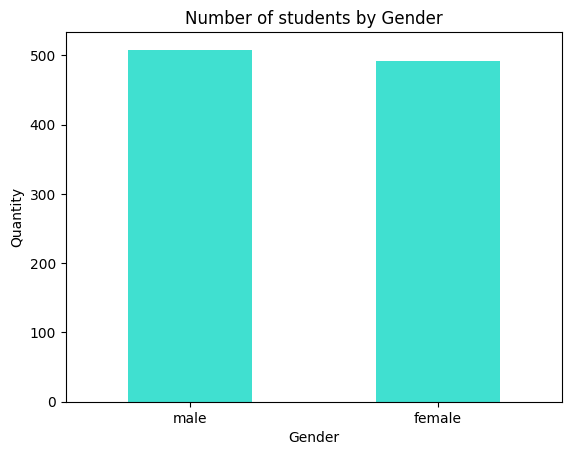

In [11]:
students_gender = df['gender'].value_counts()
students_gender.plot(kind='bar', color='turquoise')

plot.xticks(rotation=0, horizontalalignment = "center")
plot.title("Number of students by Gender")
plot.xlabel("Gender")
plot.ylabel("Quantity")

***
I want to see the number of students of every race/ethnicity group:

Text(0, 0.5, 'Quantity')

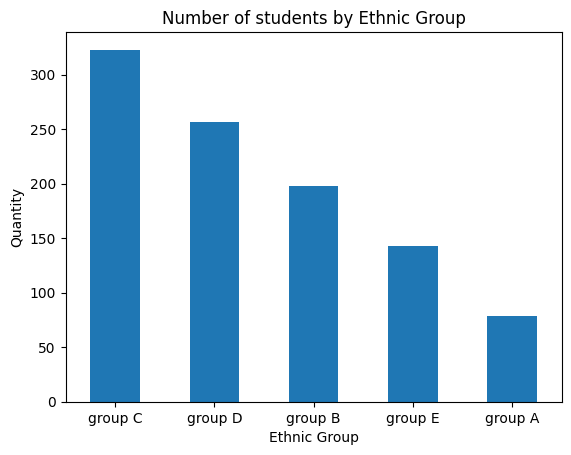

In [85]:
students_race = df['race/ethnicity'].value_counts()
students_race.plot(kind='bar')

plot.xticks(rotation=0, horizontalalignment = "center")
plot.title("Number of students by Ethnic Group")
plot.xlabel("Ethnic Group")
plot.ylabel("Quantity")

***
I want to see the education level of the parents of the students:

Text(0, 0.5, 'Quantity')

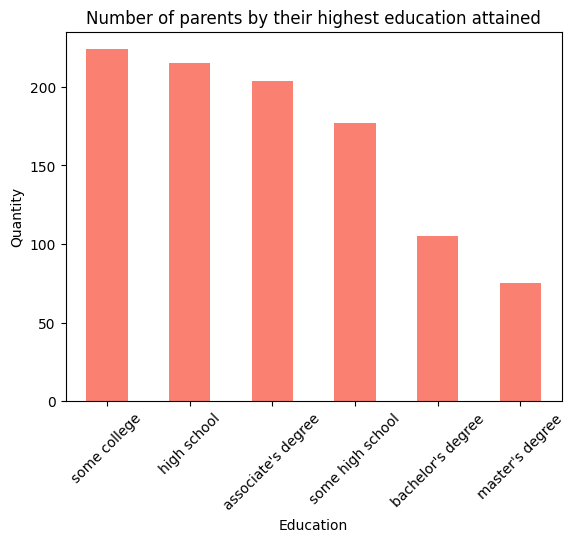

In [31]:
students_parents = df['parental level of education'].value_counts()
students_parents.plot(kind='bar', color='salmon')

plot.xticks(rotation = 45, horizontalalignment = "center")
plot.title("Number of parents by their highest education attained")
plot.xlabel("Education")
plot.ylabel("Quantity")

In [46]:
print("Parents that have a master's degree: ", round((students_parents[5]/len(df))*100,2),"%")
print("Parents that have a bachelor's degree: ", round((students_parents[4]/len(df))*100,2),"%")
print("Parents that have an associate's degree: ", round((students_parents[2]/len(df))*100,2),"%")
print("Parents that have some college: ", round((students_parents[0]/len(df))*100,2),"%")
print("Parents that have only finished high school: ", round((students_parents[1]/len(df))*100,2),"%")
print("Parents that have not finished high school: ", round((students_parents[3]/len(df))*100,2),"%")

# for i in range(5):
#    print(df['parental level of education'].unique()[i], ":", round((students_parents[i]/len(df))*100,2),"%")

Parents that have a master's degree:  7.5 %
Parents that have a bachelor's degree:  10.5 %
Parents that have an associate's degree:  20.4 %
Parents that have some college:  22.4 %
Parents that have only finished high school:  21.5 %
Parents that have not finished high school:  17.7 %


***
I want to see the correlation between the different test scores of the students:

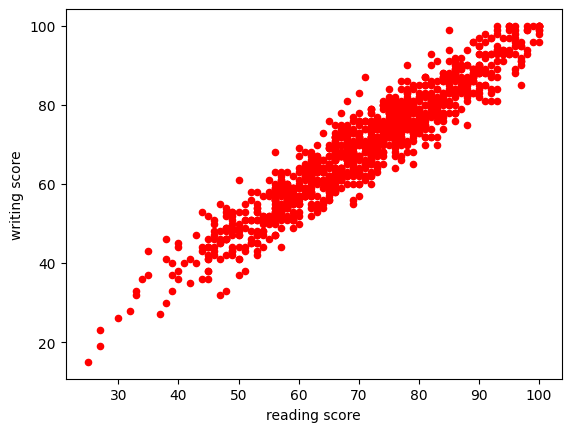

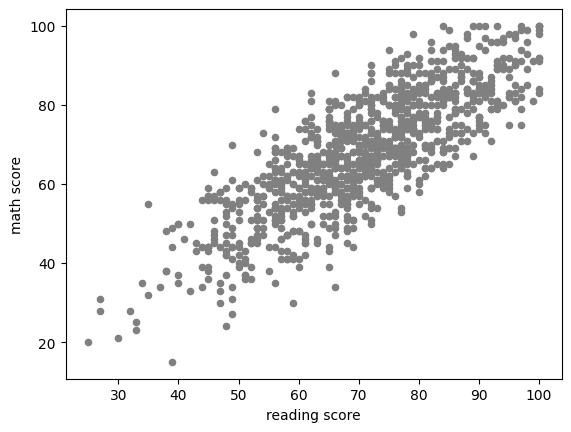

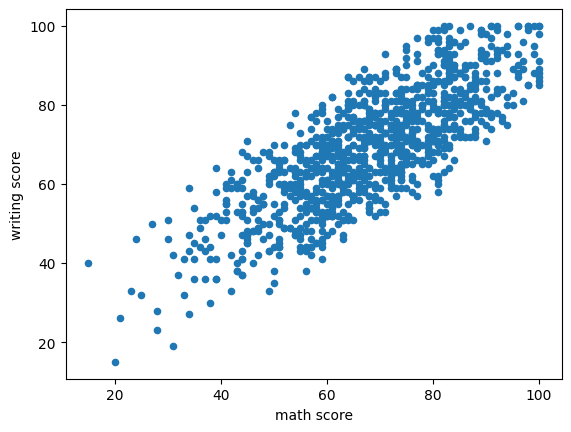

In [98]:
df.plot.scatter(x='reading score', y='writing score', color='red')
# df[['reading score','writing score']].corr()
df.plot.scatter(x='reading score', y='math score', color='grey')
# df[['math score','writing score']].corr()
df.plot.scatter(x='math score', y='writing score')
# df[['math score','reading score']].corr()
plot.show()

***
We can clearly see that there is some kind of correlation between the variables, so I am going to create a simple linear regression model.

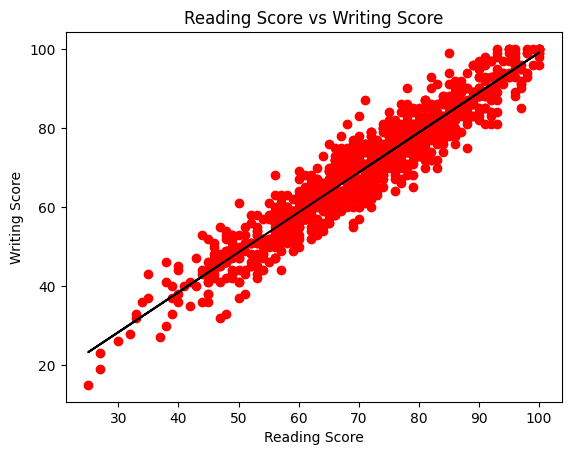

In [103]:
from sklearn.linear_model import LinearRegression
X = df.loc[:, ['reading score']]
Y = df.loc[:, ['writing score']]

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

plt.scatter(X, Y, color='red')
plt.plot(X, Y_pred, color='black')
plot.title("Reading Score vs Writing Score")
plot.xlabel("Reading Score")
plot.ylabel("Writing Score")
plt.show()

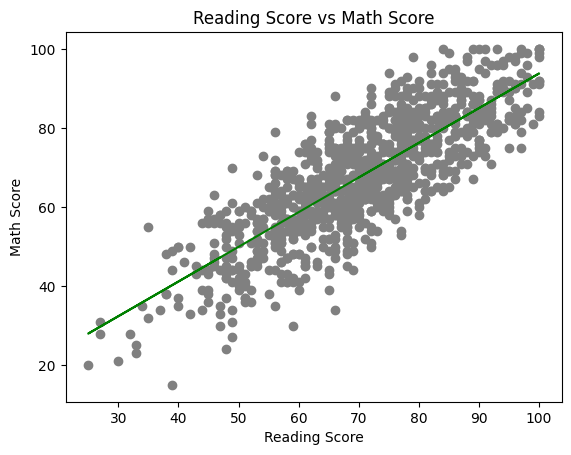

In [102]:
from sklearn.linear_model import LinearRegression

X = df.loc[:, ['reading score']]
Y = df.loc[:, ['math score']]

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

plot.scatter(X, Y, color='grey')
plot.plot(X, Y_pred, color='green')
plot.title("Reading Score vs Math Score")
plot.xlabel("Reading Score")
plot.ylabel("Math Score")
plot.show()

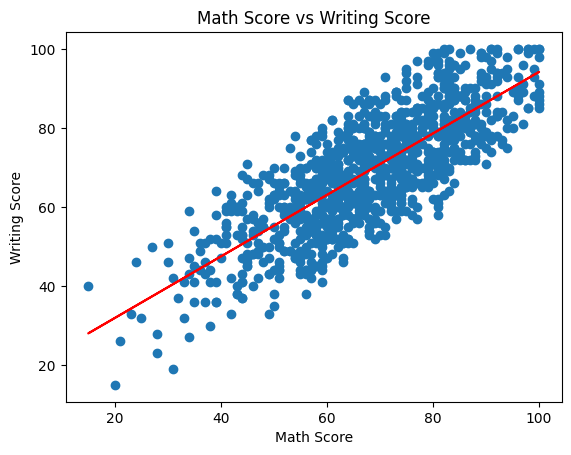

In [100]:
X = df.loc[:, ['math score']]
Y = df.loc[:, ['writing score']]

linear_regressor = LinearRegression()
linear_regressor.fit(X, Y)

Y_pred = linear_regressor.predict(X)

plot.scatter(X, Y)
plot.plot(X, Y_pred, color='red')
plot.title("Math Score vs Writing Score")
plot.xlabel("Math Score")
plot.ylabel("Writing Score")
plot.show()

***
Now i want to see if there is any relationship between the average score of a student and its Ethnicity Group

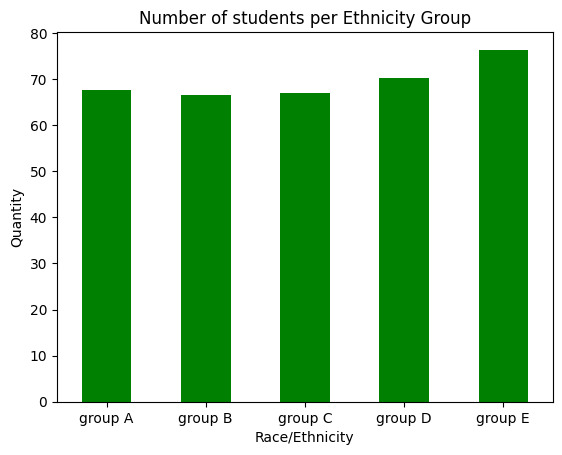

In [122]:
df2 = df.copy()

df2['Average Score'] = (df2['math score'] + df2['writing score'] + df2['reading score'])/3

averages = df2.groupby('race/ethnicity')['Average Score'].mean()
matrix_race = pd.DataFrame({'Average Score': averages})
matrix_race.plot(kind='bar', color='green',legend=False)
plot.xticks(rotation=0, horizontalalignment = "center")
plot.title("Average Score of students by Ethnicity Group")
plot.xlabel("Race/Ethnicity")
plot.ylabel("Quantity")
plot.show()

***
I want to see if there is any relationship between the average score of a student and their parents highest education achievement

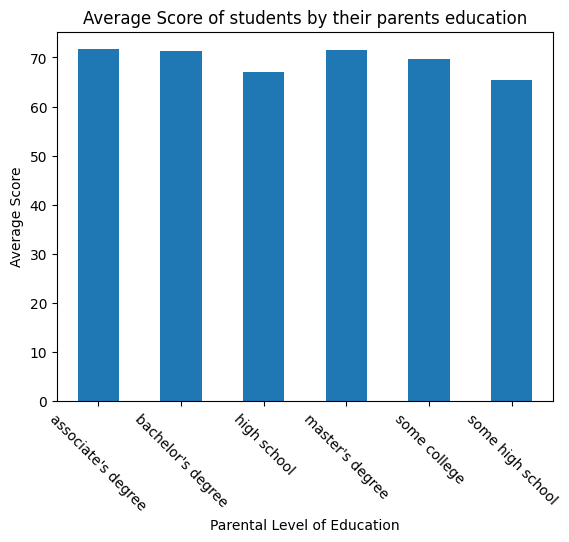

In [130]:
averages = df2.groupby('parental level of education')['Average Score'].mean()
matrix_parents = pd.DataFrame({'Average Score': averages})
matrix_parents.plot(kind='bar',legend=False)
plot.xticks(rotation=315, horizontalalignment = "center")
plot.title("Average Score of students by their parents education")
plot.xlabel("Parental Level of Education")
plot.ylabel("Average Score")
plot.show()

***
Number of students that fail vs passed

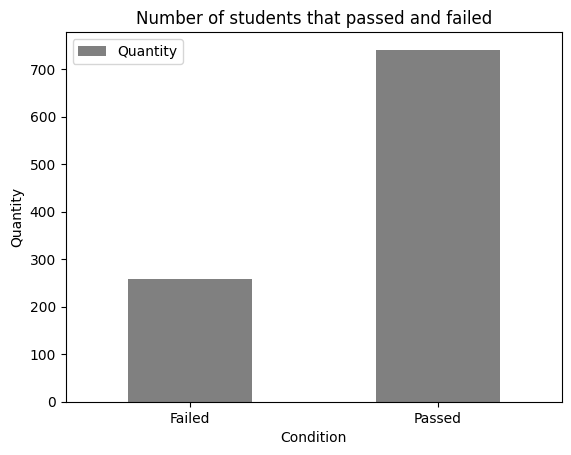

Passed: 74.1 %
Failed: 25.9 %


In [144]:
failed = (df2['Average Score'] < 60).sum()
passed = (df2['Average Score'] >= 60).sum()

# # Proportions
# total = c + i
# a = c / total
# b = i / total

matrix_pass = pd.DataFrame({"Quantity": [failed, passed]}, index=['Failed', 'Passed'])
matrix_pass.plot(kind='bar', color='grey')
plot.xticks(rotation=0, horizontalalignment = "center")
plot.title("Number of students that passed and failed")
plot.xlabel("Condition")
plot.ylabel("Quantity")
plot.show()
print('Passed:', passed/(passed+failed)*100,'%\nFailed:', round(100-passed/(passed+failed)*100,2),'%')